# The Office Final Notebook

![The Office](the_office.jpg)

In [40]:
# imports

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# importing functions from wrangle file
from wrangle import the_office, guest_office, season_episodes, max_views, cluster_df, office_time

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Acquire

In [30]:
# getting the office data from wrangle file
df = the_office()
df.head() # check_yo_head

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,director,writers,color
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,Ken Kwapis,B. J. Novak,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,Ken Whittingham,Paul Lieberstein,yellow
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,Bryan Gordon,Michael Schur,yellow
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,Greg Daniels,Greg Daniels,lightgreen


### Let's Make a Word Cloud of The Office

(-0.5, 1199.5, 799.5, -0.5)

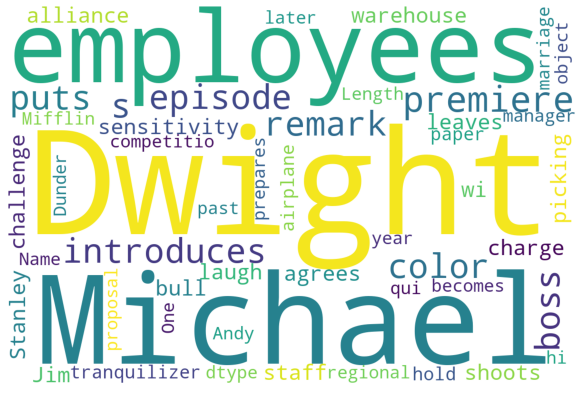

In [31]:
about = df.about
# wordcloud of what each episode is about
img = WordCloud(background_color='white', width=1200, height=800).generate(str(about))
plt.imshow(img)
plt.axis('off')

In [32]:
# getting the guest office data from wrangle file
guest_df = guest_office()
guest_df.head() # check_yo_head

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,guest_stars,director,writers,color
5,5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,26 April 2005,Amy Adams,Amy Heckerling,Mindy Kaling,yellow
8,8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.3,22,4 October 2005,Nancy Carell,Paul Feig,Michael Schur,lightgreen
9,9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.6,22,11 October 2005,Amy Adams,Ken Kwapis,B. J. Novak,lightgreen
12,12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.5,22,8 November 2005,Tim Meadows,Greg Daniels,Paul Lieberstein,lightgreen
14,14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.1,23,22 November 2005,Ken Jeong,Paul Feig,Jennifer Celotta,lightgreen


In [33]:
guest_df.shape

(29, 13)

- It looks like there are 29 episodes with a guest star
- I created a guest dataframe if I wanted to explore it further

In [34]:
# looking at how many seasons and episodes there are
season_episodes()

,season,episodes
0,1,6
1,2,22
2,3,23
3,4,14
4,5,26
5,6,26
6,7,24
7,8,24
8,9,23


### Takeaways
- There are 9 seasons of The Office
- Season 1 was the shortest season with only 6 episodes
- Season 2 through 9 averaged between 22 to 26 episodes with the exeption of season 4 with 14 episodes

# Explore

# Let's see what was the most popular episode

In [35]:
# using the max views function from wrangle to look at the most popular episode
max_views()

episode                                                         77
season                                                           5
episode_title                                        Stress Relief
about            Dwight's too-realistic fire alarm gives Stanle...
ratings                                                        9.7
votes                                                         8170
viewership                                                   22.91
duration                                                        60
date                                               1 February 2009
director                                             Jeffrey Blitz
writers                                           Paul Lieberstein
color                                                    darkgreen
Name: 77, dtype: object

In [36]:
# viewing the full summary of what the episode "Stress Relief" is about
max_views().about

"Dwight's too-realistic fire alarm gives Stanley a heart attack. When he returns, Michael learns that he is the cause of Stanley's stress. To remedy the situation, he forces the office to throw a roast for him."

### The most popular episode is from season 5: "Stress Relief"

### Now let's look at a scatterplot of Episodes and Ratings

Text(0.5, 1.0, 'Episode Ratings of The Office')

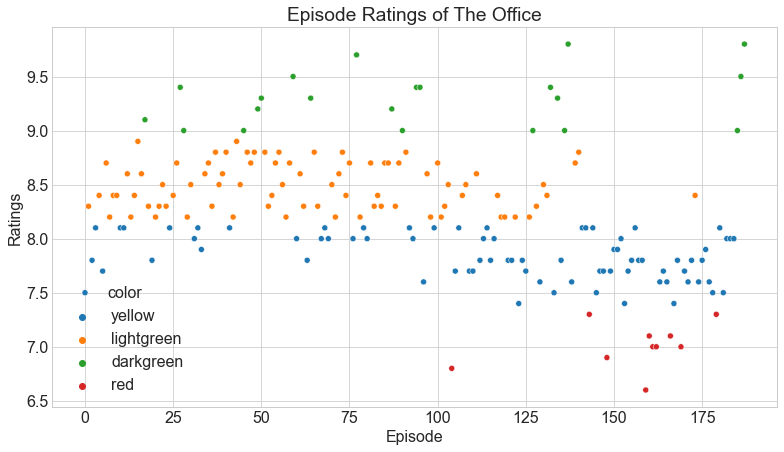

In [37]:
# Scatterplot of popular episodes
sns.scatterplot(df.episode, df.ratings, hue=df.color)
plt.xlabel("Episode")
plt.ylabel("Ratings")
plt.title("Episode Ratings of The Office")

### Episodes and Veiwership

Text(0.5, 1.0, 'Episode Viewership of The Office')

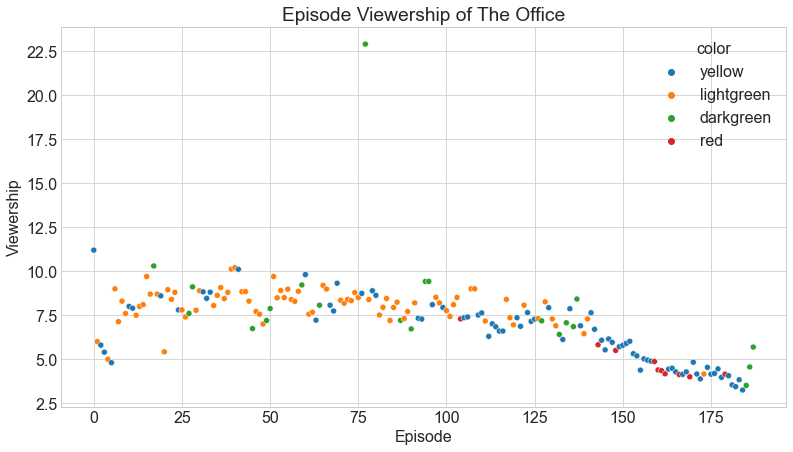

In [38]:
# Scatterplot of popular episodes
sns.scatterplot(df.episode, df.viewership, hue=df.color)
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Viewership of The Office")

### Scatterplot Takeaways
- From both graphs, the most popular episode stands out
- It looks like the last episodes per season have some of the highest ratings / views
- In terms of ratings, the very last episode has the best rating
- In terms of viewership, 77 stands out whs is "Stress Relief"

### Histogram to look at the distribution of data in the columns

array([[<AxesSubplot:title={'center':'episode'}>,
        <AxesSubplot:title={'center':'season'}>],
       [<AxesSubplot:title={'center':'ratings'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'viewership'}>,
        <AxesSubplot:title={'center':'duration'}>]], dtype=object)

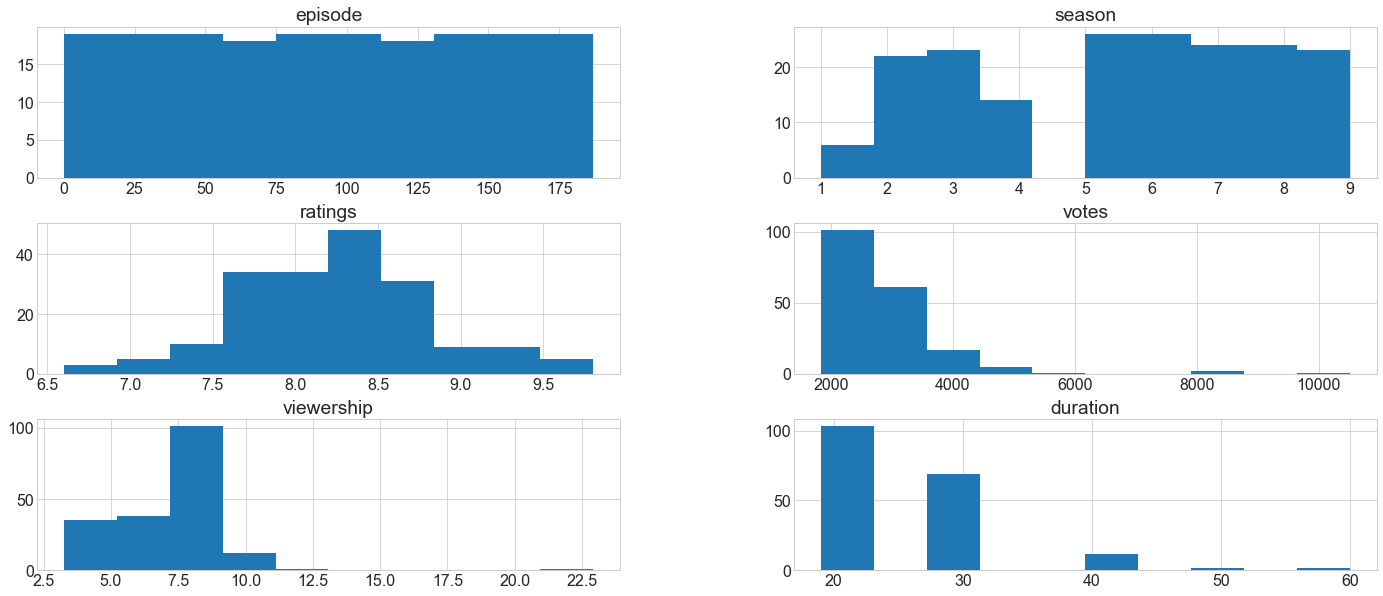

In [39]:
# histogram of the columns in the data
df.hist(figsize=(24, 10), bins=10)

- It looks like ratings is normally distributed  mostly betwen 8.0 to 8.5
- Viewership looks to have a high value around 7.5 with one higher outlier (most likely the "Stress Relief" episode)

# Time Series

In [42]:
# getting the offce time data from wrangle for time series
df = office_time()
df.head() # check_yo_head

Date Range: 2005-03-24 00:00:00 to 2013-05-16 00:00:00
Shape: (188, 15)


,episode,season,episode_title,about,ratings,votes,viewership,duration,director,writers,color,year,month,day,weekday
date,,,,,,,,,,,,,,,
2005-03-24,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow,2005,3,24,Thursday
2005-03-29,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,Ken Kwapis,B. J. Novak,lightgreen,2005,3,29,Tuesday
2005-04-05,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,Ken Whittingham,Paul Lieberstein,yellow,2005,4,5,Tuesday
2005-04-12,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,Bryan Gordon,Michael Schur,yellow,2005,4,12,Tuesday
2005-04-19,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,Greg Daniels,Greg Daniels,lightgreen,2005,4,19,Tuesday


- It looks like the first episode aired on March 24th 2005 (also my birthday)
- The last episode aired on May 16th 2013
- A little over 8 years time span for episodes and seasons

### Data Splitting

#### Percentage Based %

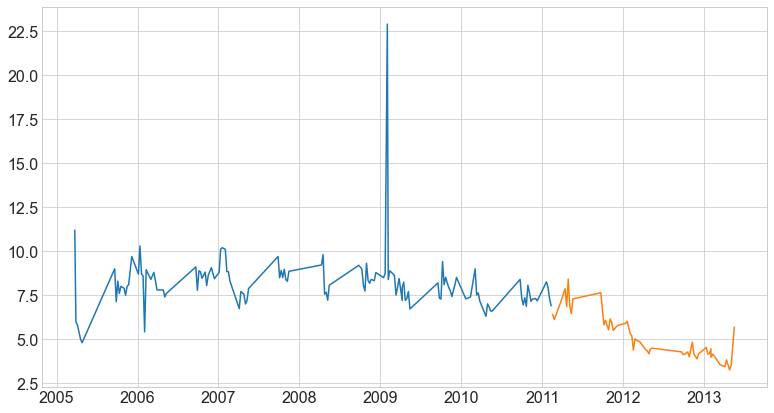

In [43]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.viewership)
plt.plot(test.index, test.viewership)

#### Human Based Data Splitting

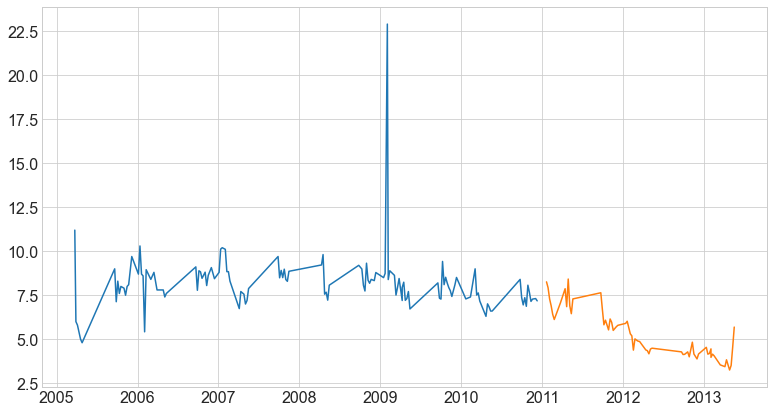

In [44]:
train = df[:'2010'] # includes everything into 2010
test = df['2011':] # everthing from 2011 to the last episode

plt.plot(train.index, train.viewership)
plt.plot(test.index, test.viewership)

### Visualization

In [45]:
# assigning the train viewership data to y 
y = train.viewership
y.head() # check_yo_head

date
2005-03-24    11.2
2005-03-29     6.0
2005-04-05     5.8
2005-04-12     5.4
2005-04-19     5.0
Name: viewership, dtype: float64

<AxesSubplot:ylabel='Frequency'>

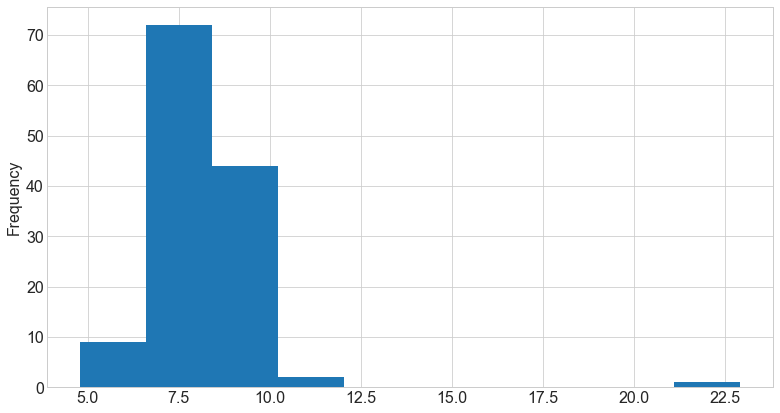

In [46]:
# plotting a histogram of the y data
y.plot.hist()

- This histogram looks similar to the histogram from all the data, so I know I am working with the correct data

In [48]:
### Taking a look at the monthly average views

[Text(0.5, 1.0, 'Average Views by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Views')]

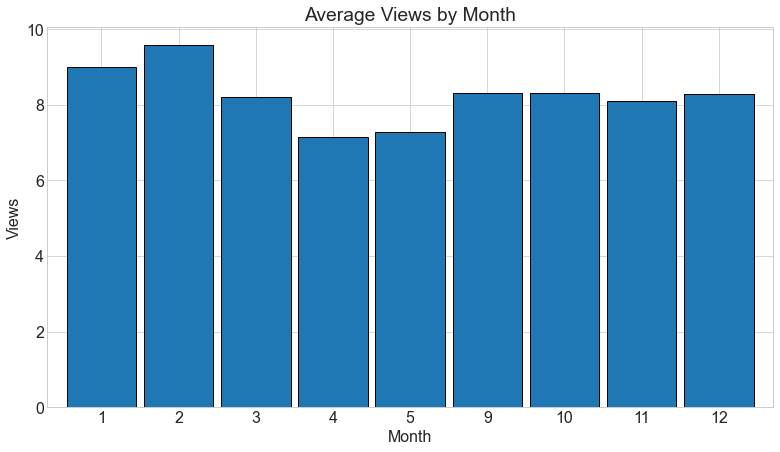

In [47]:
# looking at the average viewership by month
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Views by Month', xlabel='Month', ylabel='Views')

- February had the most views 
- April / May months had the least views

[Text(0.5, 1.0, 'Average Views by Day'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Views')]

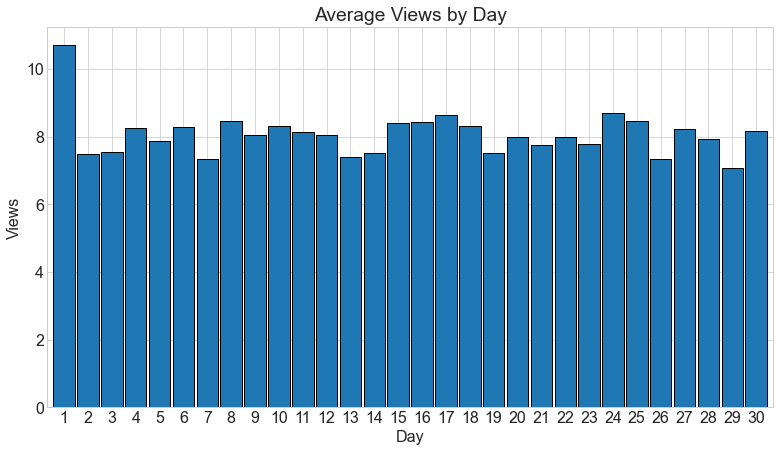

In [49]:
# bar plot of the views by day within a month
ax = y.groupby(y.index.day).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Views by Day', xlabel='Day', ylabel='Views')